# Classifier of patients with problems in the spinal column with Random Forest and K-NN

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
file =  'columna.xlsx'
xl = pd.ExcelFile(file)


In [36]:
df1=xl.parse('Columna3c')
df1.head(5)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondyolistesis,diagnose,Unnamed: 7
0,63.03,22.55,39.61,40.48,98.67,-0.25,1,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,1,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,1,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,1,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,1,DH


In [5]:
col=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle',
       'sacral slope', 'pelvic  radius', 'grade of spondyolistesis',
       'diagnose']

df2=xl.parse('C3test',header=None)
df2.columns=col
df2.head(3)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondyolistesis,diagnose
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1


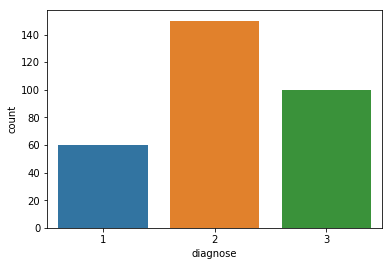

In [6]:
# Distribucion del diagnostico 
sns.countplot(df1['diagnose'],label="Count")
plt.show()

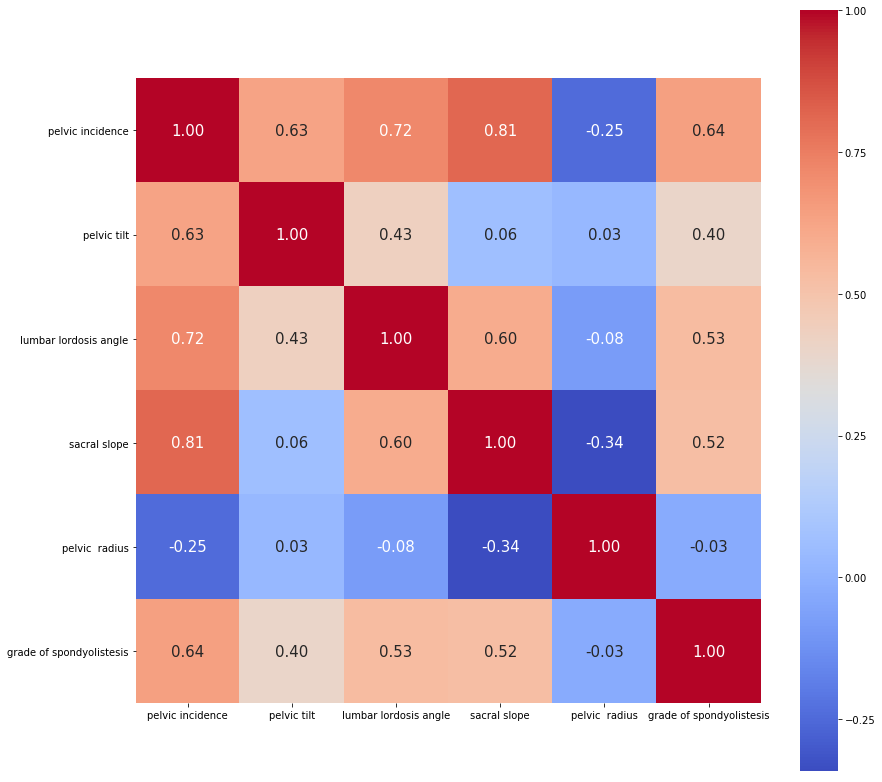

In [7]:
features= list(df1.columns[0:6])
corr = df1[features].corr() # .corr es usada para obtener la correlacion
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features,
           cmap= 'coolwarm')
plt.show()

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# TRAIN
train_x = df1.iloc[:,0:6] # entrada
train_y = df1['diagnose'] # salida

# TEST
test_x = df2.iloc[:,0:6] # entrada
test_y = df2['diagnose'] # salida

In [10]:
# RandomForest 
model=RandomForestClassifier(n_estimators=100)

In [11]:
# unir
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
# predecir
prediction=model.predict(test_x)

In [13]:
from sklearn import metrics
# presicion de la prediccion

metrics.accuracy_score(prediction,test_y)

1.0

# Matriz de Confucion 

In [33]:
# Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6 0 0]
 [0 4 0]
 [0 0 4]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


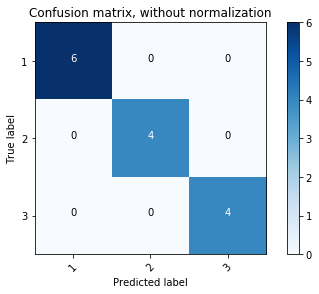

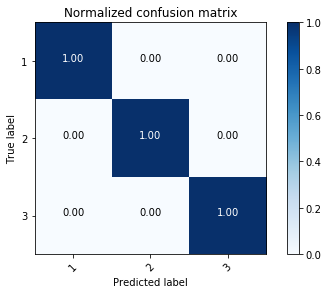

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, prediction)
np.set_printoptions(precision=2)
class_names=test_y.unique()
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [14]:
prediction

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], dtype=int64)

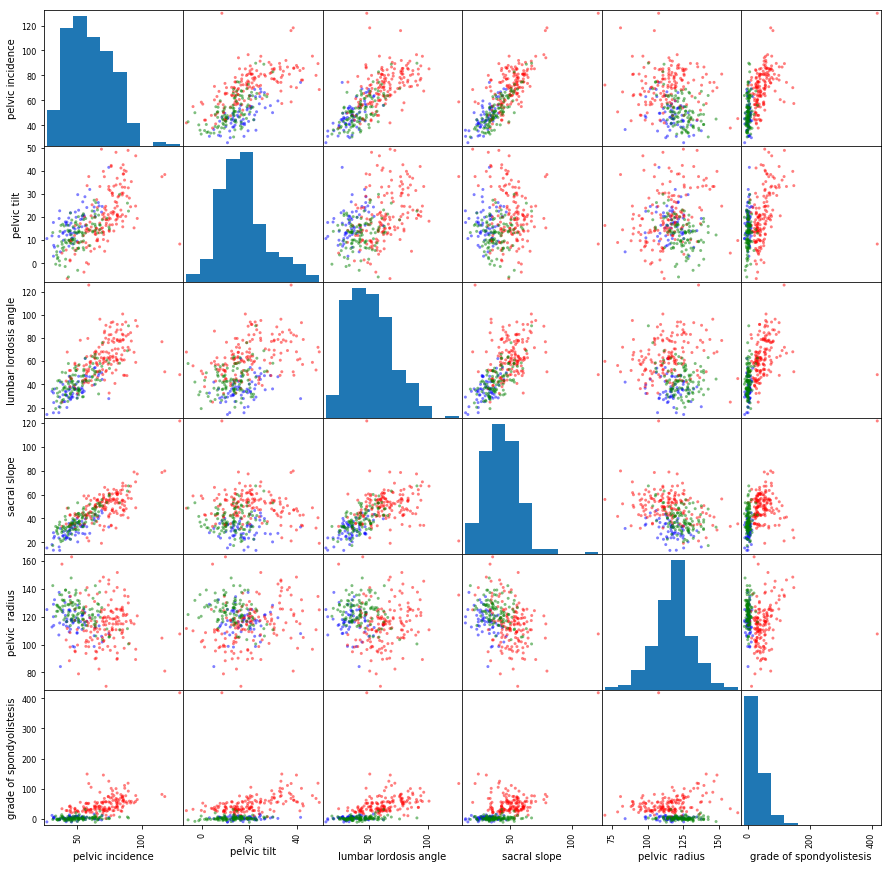

In [15]:
color_function = {1: "blue", 2: "red",3:"green"} 
colors = df1["diagnose"].map(lambda x: color_function.get(x)) 
pd.plotting.scatter_matrix(df1[features], c=colors, alpha = 0.5, figsize = (15, 15));
plt.show()

# K Nearest Neighbors

In [16]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_x,train_y)
prediction = knn.predict(test_x)
knn.score(test_x,test_y)

1.0

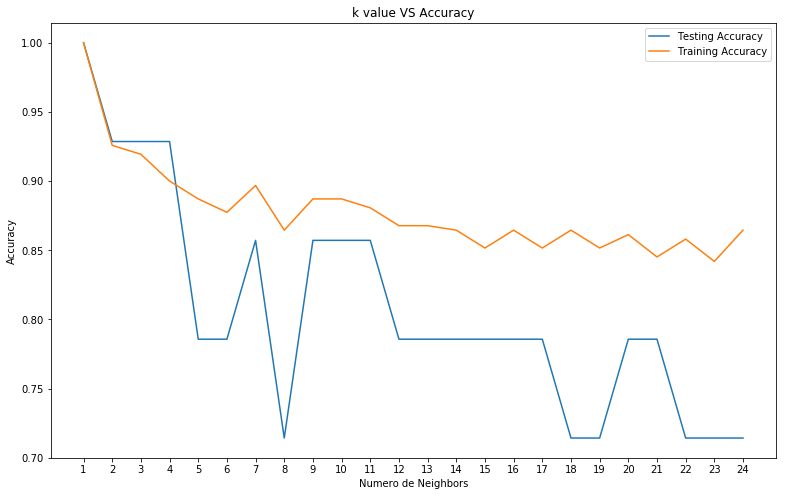

La mejor precision es 1.0 con K = 1


In [17]:
# Identificar cual es el mejor valor de K
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop sobre diferentes valores de k
for i, k in enumerate(neig):
    # k desde 1 a 25(excluido)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(train_x,train_y)
    #train accuracy
    train_accuracy.append(knn.score(train_x, train_y))
    # test accuracy
    test_accuracy.append(knn.score(test_x, test_y))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Numero de Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("La mejor precision es {} con K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

x=1;
salidanetRR = sim(net,testinput(1:6,x));
salidaRR = round(salidanetRR);

if salidaRR == testoutput(x)
    disp('Si sirve')
end 

## Test de Diagnostico

In [18]:
col1=['pelvic incidence  ', 'pelvic tilt  ', 'lumbar lordosis angle  ',
       'sacral slope  ', 'pelvic  radius  ', 'grade of spondyolistesis  ']

In [37]:
dic={}
for word in col1:
    
    g=float(input(word,  ))
    dic[word]=g

pelvic incidence  63.03
pelvic tilt  22.55
lumbar lordosis angle  39.61
sacral slope  40.48
pelvic  radius  98.67
grade of spondyolistesis  -0.25


In [38]:
datosN=pd.DataFrame([dic],columns=col1)
# 63.03 22.55 39.61 40.48 98.67 -0.25
datosN

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondyolistesis
0,63.03,22.55,39.61,40.48,98.67,-0.25


In [39]:
# Predecir

pred=model.predict(datosN)
pred= float(pred)

if pred == 1 :
    print("DH")
    
elif pred == 2:
    print("SL")
    
elif pred == 3:
    print("NO")
    
#metrics.accuracy_score(pred,test_y)

DH
